In [22]:
from src.centerlines import Centerlines
from os.path import join
import numpy as np

# Residual for 0080 Base Solver/ JC Solver

In [36]:
# load centerlines
root = '../data/healthy/0080_0001/base_solver_files/'
zerodc = Centerlines()
zerodc.load_centerlines(join(root, '0080_0001_model_centerline_results_summary.vtp'))
threedc = Centerlines()
threedc.load_centerlines(join(root, 'three_d_dir',  '0080_0001_model_converted.vtp'))

res_mpap = np.abs(threedc.get_pointdata('meanPAP') - zerodc.get_pointdata('meanPAP')) 


for name in zerodc.get_pointdata_arraynames():
    if name.startswith('sysPAP'):
        max0d = name
for name in threedc.get_pointdata_arraynames():
    if name.startswith('sysPAP'):
        max3d = name


res_sys = np.abs(threedc.get_pointdata(max3d) - zerodc.get_pointdata(max0d))
zerodc.add_pointdata(res_mpap, 'Residual mPAP |3D - 0D|')
zerodc.add_pointdata(res_sys, 'Residual sysPAP |3D - 0D|')

zerodc.write_centerlines('../images/0080_0001_residual.vtp')

In [37]:
# load centerlines
root = '../data/healthy/0080_0001/jc_solver_dir_0/'
zerodc = Centerlines()
zerodc.load_centerlines(join(root, '0080_0001_model_jc_centerline_results_summary.vtp'))
threedc = Centerlines()
threedc.load_centerlines(join(root, 'three_d_dir',  '0080_0001_model_jc_converted.vtp'))

res_mpap = np.abs(threedc.get_pointdata('meanPAP') - zerodc.get_pointdata('meanPAP'))
for name in zerodc.get_pointdata_arraynames():
    if name.startswith('sysPAP'):
        max0d = name
for name in threedc.get_pointdata_arraynames():
    if name.startswith('sysPAP'):
        max3d = name

res_sys = np.abs(threedc.get_pointdata(max3d) - zerodc.get_pointdata(max0d))
zerodc.add_pointdata(res_mpap, 'Residual mPAP |3D - 0D|')
zerodc.add_pointdata(res_sys, 'Residual sysPAP |3D - 0D|')
zerodc.write_centerlines('../images/0080_0001_jc_residual.vtp')

# Residual for 0118_1000

In [59]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

[35.21187101 35.21150857 35.21113257 35.21069817 35.21028852 35.20987591
 35.2094652  35.20908024 35.2086689  35.20822951 35.2077032  35.20711106
 35.20647898 35.20588793 35.20527448 35.20462777 35.20396604 35.20337486
 35.2027524  35.20202111 35.20128165 35.20068429 35.20011871 35.19947389
 35.19883428 35.19823803 35.1976994  35.19716094 35.19657761 35.19609022
 35.19570658 35.19526916 35.1946992  35.19411309 35.19353731 35.19297036
 35.19241016 35.19195304 35.19163858 35.19134079 35.19094615 35.19052396
 35.19020393 35.18992626 35.18958601 35.18917746 35.18879622 35.18846253
 35.18818793 35.18794951 35.1877292  35.18753306 35.18731474 35.18703408
 35.18668641 35.18639059 35.18616198 35.18592974 35.18560666 35.18517901
 35.18478408 35.18445635 35.18421003 35.18404691 35.18390066 35.18369203
 35.18338758 35.18304586 35.18262897 35.18211078 35.18166978 35.1813692
 35.18114353 35.18096853 35.18081586 35.18061865 35.18031691 35.17989575
 35.17950352 35.17922014 35.1789763  35.17868169 35.

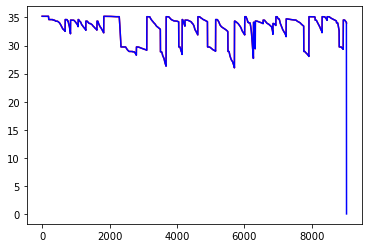

In [82]:
# load centerlines
root = '../data/stenosis/0118_1000/base_solver_files/'
zerodc = Centerlines()
zerodc.load_centerlines(join(root, '0118_1000_model_centerline_results_summary.vtp'))
threedc = Centerlines()
threedc.load_centerlines(join(root, 'three_d_dir',  '0118_1000_model_converted.vtp'))

mpap0d = zerodc.get_pointdata('meanPAP')
mpap3d = threedc.get_pointdata('meanPAP')
branch_id = zerodc.get_pointdata(zerodc.PointDataFields.BRANCHID)
print(mpap0d[np.where(branch_id == 12)])
print(mpap3d[np.where(branch_id == 12)])



mpap3d = threedc.get_pointdata('meanPAP')
mpap0d = zerodc.get_pointdata('meanPAP')
print(len(mpap0d), len(mpap3d))
f = interp1d(np.array(list(range(len(mpap0d)))), mpap0d)
mpap0d_new = f(np.array(list(range(len(mpap3d)))))

plt.plot(np.array(list(range(len(mpap0d)))),mpap0d, 'r' )
plt.plot(np.array(list(range(len(mpap0d_new) + 4))), np.pad(mpap0d_new, (0, 4)), 'b')

res_mpap = np.abs(mpap3d - mpap0d_new)
print(res_mpap)


res_sys = np.abs(np.pad(threedc.get_pointdata(max3d), (0, 4)) - zerodc.get_pointdata(max0d))
threedc.add_pointdata(res_mpap, 'Residual mPAP |3D - 0D|')
threedc.add_pointdata(res_sys, 'Residual sysPAP |3D - 0D|')

threedc.write_centerlines('../images/0118_1000_residual.vtp')

In [78]:
res_mpap2 = res_mpap

9029 9025
[11.0881551  11.02255975 10.97069428 ... 22.42395954 22.41488658
 22.42726939]


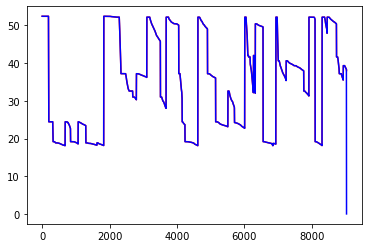

In [81]:
# load centerlines
root = '../data/stenosis/0118_1000/jc_solver_dir_0/'
zerodc = Centerlines()
zerodc.load_centerlines(join(root, '0118_1000_model_jc_centerline_results_summary.vtp'))
threedc = Centerlines()
threedc.load_centerlines(join('../data/stenosis/0118_1000/base_solver_files/', 'three_d_dir',  '0118_1000_model_converted.vtp'))

mpap3d = threedc.get_pointdata('meanPAP')
mpap0d = zerodc.get_pointdata('meanPAP')
print(len(mpap0d), len(mpap3d))
f = interp1d(np.array(list(range(len(mpap0d)))), mpap0d)
mpap0d_new = f(np.array(list(range(len(mpap3d)))))

plt.plot(np.array(list(range(len(mpap0d)))),mpap0d, 'r' )
plt.plot(np.array(list(range(len(mpap0d_new) + 4))), np.pad(mpap0d_new, (0, 4)), 'b')

res_mpap = np.abs(mpap3d - mpap0d_new)
print(res_mpap)

for name in zerodc.get_pointdata_arraynames():
    if name.startswith('sysPAP'):
        max0d = name
for name in threedc.get_pointdata_arraynames():
    if name.startswith('sysPAP'):
        max3d = name


res_sys = np.abs(np.pad(threedc.get_pointdata(max3d), (0, 4)) - zerodc.get_pointdata(max0d))
threedc.add_pointdata(res_mpap, 'Residual mPAP |3D - 0D|')
threedc.add_pointdata(res_sys, 'Residual sysPAP |3D - 0D|')

threedc.write_centerlines('../images/0118_1000_jc_residual.vtp')

In [69]:
res_mpap - res_mpap2

array([0., 0., 0., ..., 0., 0., 0.])